## ADS505 Final Project
## Dataset: Hotel Reservations
## Vivian Do, Mirna Philip, Halee Staggs


### Attribute Description

| Column Name                           | Description                                                                                      |
|---------------------------------------|--------------------------------------------------------------------------------------------------|
| Booking_ID                            | Unique identifier of each booking                                                                |
| no_of_adults                          | Number of adults                                                                                 |
| no_of_children                        | Number of Children                                                                               |
| no_of_weekend_nights                  | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel  |
| no_of_week_nights                     | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel      |
| type_of_meal_plan                     | Type of meal plan booked by the customer                                                         |
| required_car_parking_space            | Does the customer require a car parking space? (0 - No, 1- Yes)                                   |
| room_type_reserved                    | Type of room reserved by the customer                                                             |
| lead_time                             | Number of days between the date of booking and the arrival date                                   |
| arrival_year                          | Year of arrival date                                                                             |
| arrival_month                         | Month of arrival date                                                                            |
| arrival_date                          | Date of the month                                                                                |
| market_segment_type                   | Market segment designation                                                                       |
| repeated_guest                        | Is the customer a repeated guest? (0 - No, 1- Yes)                                               |
| no_of_previous_cancellations          | Number of previous bookings that were canceled by the customer prior to the current booking     |
| no_of_previous_bookings_not_canceled  | Number of previous bookings not canceled by the customer prior to the current booking           |
| avg_price_per_room                    | Average price per day of the reservation; prices of the rooms are dynamic (in euros)            |
| no_of_special_requests                | Total number of special requests made by the customer                                            |
| booking_status                        | Flag indicating if the booking was canceled or not                                               |


### Library and Data Import

In [1]:
#Importing all the necessary packages
%pip install scikitplot
%pip install dmba
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats import yeojohnson
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, PowerTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.linear_model import LogisticRegressionCV, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from dmba import stepwise_selection, regressionSummary, classificationSummary, adjusted_r2_score, AIC_score, BIC_score, plotDecisionTree,gainsChart

ERROR: Could not find a version that satisfies the requirement scikitplot (from versions: none)
ERROR: No matching distribution found for scikitplot
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
no display found. Using non-interactive Agg backend


In [35]:
!pip install ipympl
import ipympl

In [3]:
#uploating the dataset
df = pd.read_csv("Hotel Reservations.csv")
# display of first three rows  in the dataframe
df.head

<bound method NDFrame.head of       Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       

### Understanding the dataset

In [4]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
# Dimensions: 36275 observations and 19 variables
df.shape

(36275, 19)

In [6]:
#Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
#df.describe() provides statistics such as the mean, minimum, standard deviation, and more.
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
# Data spans two years (2017-2018)
df['arrival_year'].value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

In [9]:
# Distribution of outcome variable -- Class imbalance, needs to be addressed in training set
print(df['booking_status'].value_counts())
print('\n',df['booking_status'].value_counts()/len(df))

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

 Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64


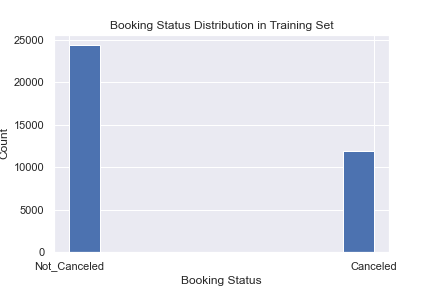

In [36]:
# Booking status distribution
plt.hist(df['booking_status'])
plt.title('Booking Status Distribution in Training Set')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.show()

In [11]:
#Data from children?
adult_zero = pd.DataFrame(df[df['no_of_adults'] == 0])
adult_zero['booking_status'].value_counts()

Not_Canceled    95
Canceled        44
Name: booking_status, dtype: int64

In [12]:
#Check for rows that report no adults or children
both = pd.DataFrame(df[(df['no_of_adults'] == 0) & (df['no_of_children'] == 0)])
both['booking_status'].value_counts()  # None

Series([], Name: booking_status, dtype: int64)

In [13]:
#Check if any reservations report being not a week or weekend day
no_day_type = pd.DataFrame(df[(df['no_of_weekend_nights'] == 0) & (df['no_of_week_nights'] == 0)])
no_day_type['booking_status'].value_counts()  # Drop these later

Not_Canceled    76
Canceled         2
Name: booking_status, dtype: int64

In [14]:
df['required_car_parking_space'].value_counts()

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

In [15]:
df['repeated_guest'].value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

In [16]:
df['arrival_month'].value_counts()

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

In [17]:
df['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [18]:
df['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [19]:
df['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [20]:
#The sum count of the duplicated values
df.duplicated().sum()

0

## Data Preparation

In [21]:
# Drop non-predictors
df=df.drop(['Booking_ID'],axis=1)

In [22]:
# Convert columns to correct datatypes 

# Categorical='object'/'category'
# Numerical='int'/'float'
df['type_of_meal_plan']=df['type_of_meal_plan'].astype('category')
df['required_car_parking_space']=df['required_car_parking_space'].astype('category')
df['room_type_reserved']=df['room_type_reserved'].astype('category')
df['arrival_year']=df['arrival_year'].astype('category')
df['arrival_month']=df['arrival_month'].astype('category')
df['market_segment_type']=df['market_segment_type'].astype('category')
df['repeated_guest']=df['repeated_guest'].astype('category')
df['booking_status']=df['booking_status'].astype('category')

# Show all categorical data
print('Categorical attributes \n',df.select_dtypes(include=['category']).columns)

# Show all numerical data
print('\n Numerical attributes \n',df.select_dtypes(include=['integer','float']).columns)

Categorical attributes 
 Index(['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
       'arrival_year', 'arrival_month', 'market_segment_type',
       'repeated_guest', 'booking_status'],
      dtype='object')

 Numerical attributes 
 Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'arrival_date',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')


### **Outlier**

/opt/miniconda3/envs/ADS500B/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

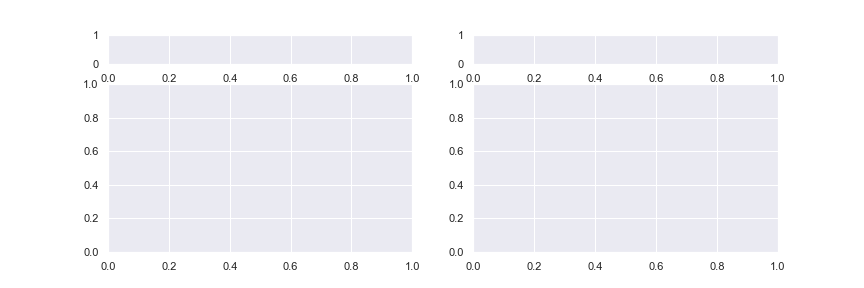

In [37]:
def print_box_hist(data, data1, data2):
    sns.set(style="darkgrid")
    f, axes = plt.subplots(2, 2, figsize=(12, 4), gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(data, x=data1, orient="h", ax=axes[0, 0])
    sns.histplot(data, x=data1, ax=axes[1, 0])

    sns.boxplot(data, x=data2, orient="h", ax=axes[0, 1])
    sns.histplot(data, x=data2, ax=axes[1, 1])

    axes[0, 0].set(xlabel='')
    axes[0, 1].set(xlabel='')

    plt.show()

print_box_hist(df, 'no_of_adults', 'no_of_children')
print_box_hist(df, 'lead_time', 'no_of_weekend_nights')
print_box_hist(df, 'no_of_week_nights', 'avg_price_per_room')
print_box_hist(df, 'required_car_parking_space', 'lead_time')
print_box_hist(df, 'arrival_year', 'arrival_month')
print_box_hist(df, 'arrival_date', 'repeated_guest')
print_box_hist(df, 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled')
print_box_hist(df, 'avg_price_per_room', 'no_of_special_requests')


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

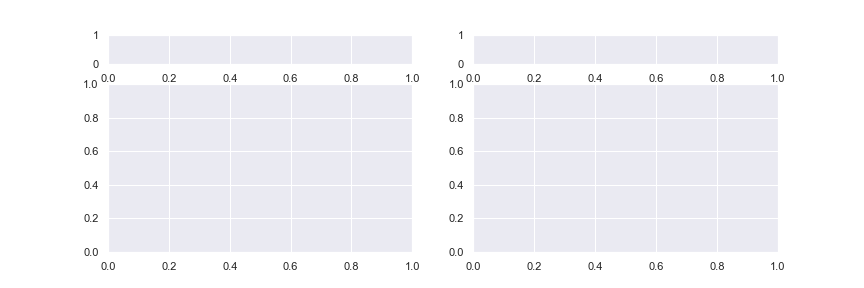

In [38]:
# removing the outluers from dataset
def remove_outliers(data, columns, lower_bound = 0.25, upper_bound = 0.75):
    masks = []
    for column in columns:
        q1 = data[column].quantile(lower_bound)
        q3 = data[column].quantile(upper_bound)
        iqr = q3 - q1

        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        mask = (data[column] >= lower) & (data[column] <= upper)
        masks.append(mask)

    # Combine the masks
    final_mask = np.all(masks, axis=0)
    # Remove outliers
    final_dataset = data[final_mask]

    return final_dataset

#removing outlers
columns=["no_of_children","lead_time","no_of_week_nights","avg_price_per_room","lead_time", "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled","avg_price_per_room", "no_of_special_requests"]
removeOutliers= remove_outliers(df,columns)

print_box_hist(removeOutliers, 'no_of_adults', 'no_of_children')
print_box_hist(removeOutliers, 'lead_time', 'no_of_weekend_nights')
print_box_hist(removeOutliers, 'no_of_week_nights', 'avg_price_per_room')
print_box_hist(removeOutliers, 'required_car_parking_space', 'lead_time')
print_box_hist(removeOutliers, 'arrival_year', 'arrival_month')
print_box_hist(removeOutliers, 'arrival_date', 'repeated_guest')
print_box_hist(removeOutliers, 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled')
print_box_hist(removeOutliers, 'avg_price_per_room', 'no_of_special_requests')

In [41]:
df['no_of_previous_bookings_not_canceled'].value_counts()

0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: no_of_previous_bookings_not_canceled, dtype: int64

In [26]:
# Show value counts---possibly bin into three categories (0, 1-3, 5+)
df['no_of_previous_cancellations'].value_counts()


0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

Most guests did not have a previous cancellation. We will convert this numerical variable to a binary variable where:

    * 0 = guest did not have a previous cancellation
    * 1 = guest did have a previous cancellation

In [30]:
df['binary_cancellation'] = df['no_of_previous_cancellations'].apply(lambda x: 1 if x > 0 else 0)
df['binary_cancellation']=df['binary_cancellation'].astype('category')

In [ ]:
# Create a new column 'no_of_previous_cancellations' with values '0', '1-3', and '5+'
#df['no_of_previous_cancellations'] = pd.cut(df['no_of_previous_cancellations'],
#                                     bins=[-1, 0, 3, float('inf')],
#                                      labels=['0', '1-3', '5+'],
#                                      right=False)
# Show value counts---possibly bin into three categories (0, 1-3, 5+)
# df['no_of_previous_cancellations'].value_counts()

### Feature Engineering

1. Calculate cancellation rate based on the number of previous cancellations out of all bookings

In [50]:
df['cancellation_rate']=df['no_of_previous_cancellations']/((df['no_of_previous_cancellations'])+(df['no_of_previous_bookings_not_canceled']))
df['cancellation_rate']=df['cancellation_rate'].astype('float64')
df['cancellation_rate'].value_counts()

0.000000    592
1.000000    118
0.166667     16
0.200000     15
0.333333     15
           ... 
0.089286      1
0.120000      1
0.075000      1
0.078947      1
0.190476      1
Name: cancellation_rate, Length: 81, dtype: int64

## Exploratory Data Analysis

In [32]:
#Get a list of numeric column names in a DataFrame.
def numeric_cols(data):
    num_cols = []
    for col in data.columns:
        if data[col].dtype == 'int64' or data[col].dtype == 'float64':
            num_cols.append(col)
    return num_cols
numeric_columns = numeric_cols(df)
print(numeric_columns)


['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [33]:
#Get a list of categorical column names in a DataFrame.
def category_columns(data):
  cat_cols = []
  for i in data:
    if data[i].dtype == 'object' or data[i].dtype == 'category':
      cat_cols.append(i)
  return cat_cols
categorical_columns = category_columns(df)
print(categorical_columns)


['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_year', 'arrival_month', 'market_segment_type', 'repeated_guest', 'booking_status', 'binary_cancellation']


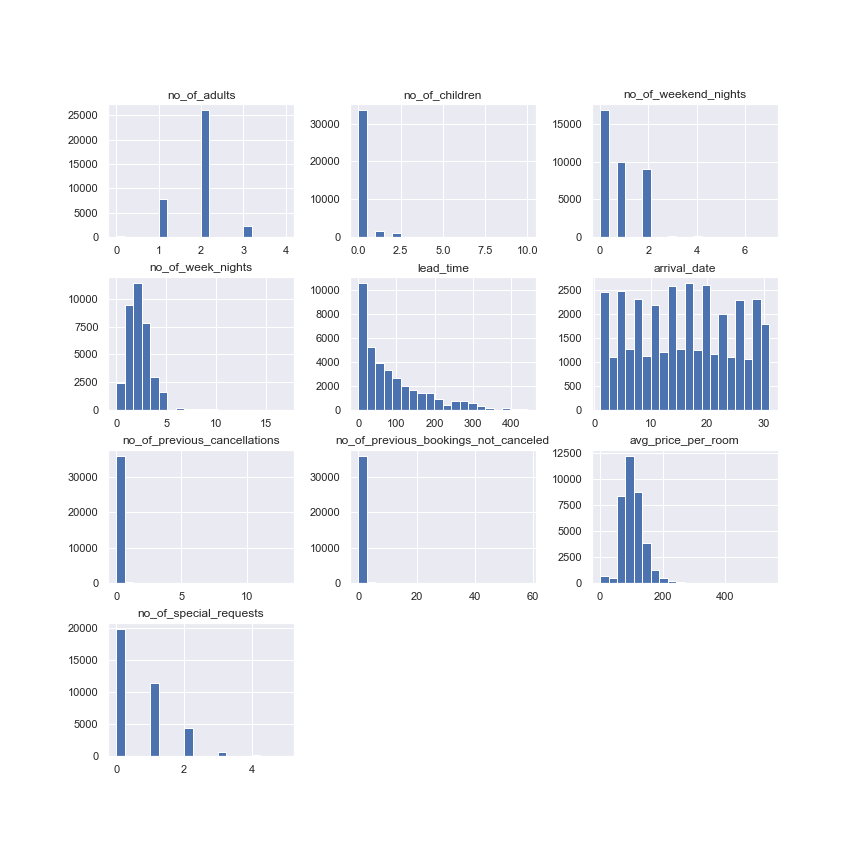

In [39]:
#Distributions for numerical variables
df.hist(figsize=(12,12),bins=20)
plt.show()

<AxesSubplot:title={'center':'Heat Map of Correlation Coefficients'}>

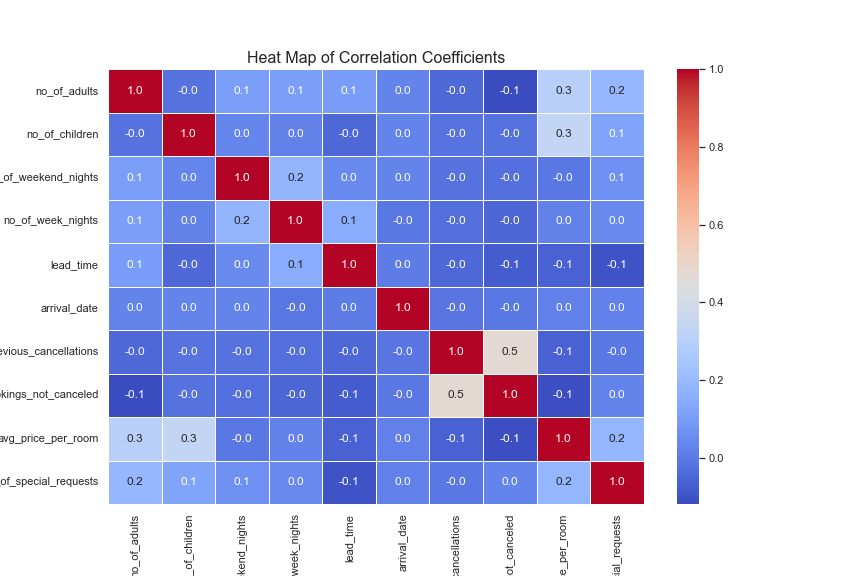

In [42]:
#Correlations between numerical variables
plt.figure(figsize=(12, 8))
plt.title("Heat Map of Correlation Coefficients", fontsize=16)
sns.heatmap(df.corr(), cmap = 'coolwarm', fmt = '.1f', linewidths = 1, annot = True)

In [ ]:
#All numerical values have low to no correlation with each other
df.corr()

In [ ]:
# numeric columns for the box plot
numeric_columns = ['no_of_adults', 'no_of_children',
                   'no_of_weekend_nights', 'no_of_week_nights',
                   'required_car_parking_space', 'lead_time', 'arrival_year',
                   'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations',
                   'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

In [ ]:
# Histograms for numerical variables
for column in df[numeric_columns].columns:
    plt.hist(df[numeric_columns][column])
    plt.title(f"Distribution of {column}")
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
# box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_columns], orient="h", palette="Set2")
plt.title("Box Plots for Numeric Columns")
plt.xlabel("Value")
plt.show()


In [ ]:
df_cat = df[['type_of_meal_plan',
             'room_type_reserved',
             'market_segment_type',
             'repeated_guest']]
# Create cross-tab for categorical variables
for column in df_cat.columns:
    cross_tab = pd.crosstab(index=df_cat[column], columns=df['booking_status'])
    print(cross_tab)
    print("\n")

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x='value', hue='variable', data= pd.melt(df, value_vars=df_cat[0:4]))
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x='value', hue='variable', data= pd.melt(df, value_vars=df_cat[4:7]))
plt.show()

Checking for outlier

In [ ]:
#some Histograms for the numerical clumns
for col in numeric_cols(removeOutliers):
    plt.figure(figsize=(12, 6))
    # Histogram
    plt.subplot(1, 2, 2)
    plt.hist(removeOutliers[col], bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [ ]:
categorical_columns= removeOutliers[[ 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']]
categorical_columns

In [ ]:
# Create bar plots for all categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))

    # Bar plot
    value_counts = removeOutliers[col].value_counts()
    value_counts.plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [ ]:
# Create stacked bar charts
for col in categorical_columns:
  plt.figure(figsize=(10, 6))

  # plot
  cross_tab = pd.crosstab(index=removeOutliers[col], columns=removeOutliers['booking_status'])
  cross_tab.plot(kind='bar', stacked=True)
  plt.title(f"{col} by Booking Status")
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()

In [ ]:
# Stacked bar charts
for column in df_cat.columns:
    cross_tab = pd.crosstab(index=df_cat[column], columns=df['booking_status'])
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f"{column} by Booking Status")
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

### **Time Series**

In [ ]:
# Combine year, month, day into 1 column in datetime format ('full_arrival_date')
df['day']=df['arrival_date'].copy()
df['month']=df['arrival_month'].copy()
df['year']=df['arrival_year'].copy()
df['full_arrival_date']=pd.to_datetime(df[['year','month','day']],format='%Y-%M-%D',errors='coerce')

In [ ]:
# New outcome variable
df['booking_status_binary']=pd.get_dummies(df['booking_status'],drop_first=True)

In [ ]:
# All reservations time-series (takes ~25 sec to run)
sns.lineplot(data=df, x='full_arrival_date', y='booking_status_binary')
plt.xticks(rotation=45)
plt.title('All Reservations')


## **Data Split and Preprocessing Pipeline**

In [ ]:
df.head()

In [ ]:
df.booking_status_binary

In [ ]:
X = df.drop(['booking_status','booking_status_binary'], axis=1)
y = df['booking_status_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 27000, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=15000, random_state=1)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

In [ ]:
#Final list of variables
cats_final = ['required_car_parking_space','repeated_guest','meal_plan','room_type_reserved', 'market_segment_type']
nums_final = ['no_of_adults', 'no_of_children', 'lead_time', 'no_of_previous_cancellations', 'total_nights',
              'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

In [ ]:
cat_pipe = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))])
num_pipe = Pipeline([('variance', VarianceThreshold()),('skew_standardize', PowerTransformer())])
all_pipe = make_pipeline(ColumnTransformer([('cat', cat_pipe, cats_final),('num', num_pipe, nums_final)]))
all_pipe


# References
 * https://saturncloud.io/blog/pandas-seaborn-countplot-from-several-columns/